<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/HW/dnxjay/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exercise 1

In [1]:
!pip install qutip
import qutip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 18.2 MB/s eta 0:00:00


In [2]:
print(qutip.basis(2, 0))

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]


In [3]:
qutip.bell_state(state='00')

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]]

In [6]:
def photon_count(state: qutip.Qobj) -> float:
    """
    Computes the expectation value of the photon number operator ⟨n⟩.

    Parameters:
        state (qutip.Qobj): Quantum state.

    Returns:
        float: Photon number expectation value.
    """
    return qutip.expect(qutip.num(10), state)  # Returns float!

In [7]:
photon_count(qutip.coherent(10, 1))

0.9999999259365113

In [9]:
def create_fock_state(n: int, dims: int) -> qutip.Qobj:
    """
    Creates a Fock state |n⟩ in a Hilbert space of dimension 'dims'.

    Parameters:
        n (int): Quantum number (must be an integer).
        dims (int): Dimension of the Hilbert space.

    Returns:
        qutip.Qobj: The Fock state |n⟩.

    Raises:
        ValueError: If n is not a non-negative integer.
    """
    return qutip.fock(dims, n)

In [10]:
create_fock_state(3, 7)

Quantum object: dims=[[7], [1]], shape=(7, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]]

In [11]:

def create_coherent_state(alpha: float, dimension: int) -> qutip.Qobj:
    """
    Creates a coherent state |α⟩ using QuTiP.

    Parameters:
        alpha (complex): Complex displacement parameter.
        dimension (int): Hilbert space size.

    Returns:
        qutip.Qobj: The coherent state |α⟩.
    """
    return qutip.coherent(dimension, alpha)

def photon_number_expectation(state: qutip.Qobj) -> float:
    """
    Computes the expectation value of the photon number operator ⟨n⟩.

    Parameters:
        state (qutip.Qobj): Quantum state.

    Returns:
        float: Photon number expectation value.
    """
    N = state.dims[0][0]
    return qutip.expect(qutip.num(N), state)

In [12]:
create_coherent_state(3.5, 7)

Quantum object: dims=[[7], [1]], shape=(7, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.13347913]
 [-0.29933031]
 [ 0.4683691 ]
 [-0.44577563]
 [ 0.49450793]
 [-0.23867319]
 [ 0.41592809]]

In [13]:
photon_number_expectation(qutip.coherent(7, 3.5))

3.4254394790955507

## Exercise 2

#2.1

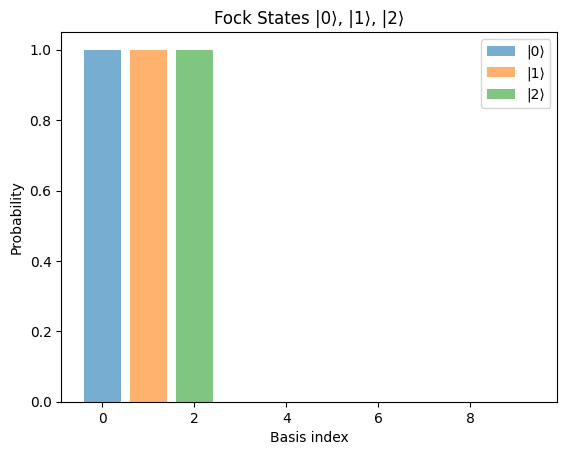

In [16]:
import matplotlib.pyplot as plt
from qutip import fock

# Set Hilbert space dimension
N = 10

# Create Fock states |0>, |1>, |2>
states = [fock(N, n) for n in range(3)]

# Plot all on one chart
for n, state in enumerate(states):
    probs = state.full().flatten()**2
    plt.bar(range(N), probs, alpha=0.6, label=f'|{n}⟩')

plt.title('Fock States |0⟩, |1⟩, |2⟩')
plt.xlabel('Basis index')
plt.ylabel('Probability')
plt.legend()
plt.show()

#2.2

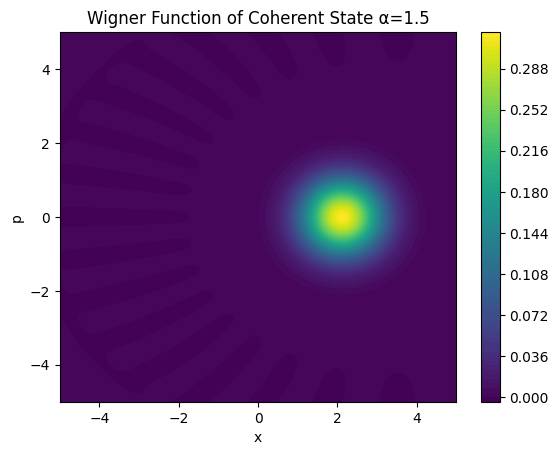

In [17]:
import numpy as np
from qutip import wigner
from matplotlib import pyplot as plt
from qutip import Qobj

# Assuming you have the function from Exercise 1
def create_coherent_state(alpha: complex, dimension: int) -> Qobj:
    from qutip import coherent
    return coherent(dimension, alpha)

# Generate coherent state
dimension = 20
alpha = 1.5
coherent_state = create_coherent_state(alpha, dimension)

# Plot Wigner function
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = wigner(coherent_state, x, y)

plt.contourf(X, Y, Z, 100)
plt.title(f'Wigner Function of Coherent State α={alpha}')
plt.xlabel('x')
plt.ylabel('p')
plt.colorbar()
plt.show()

#2.3


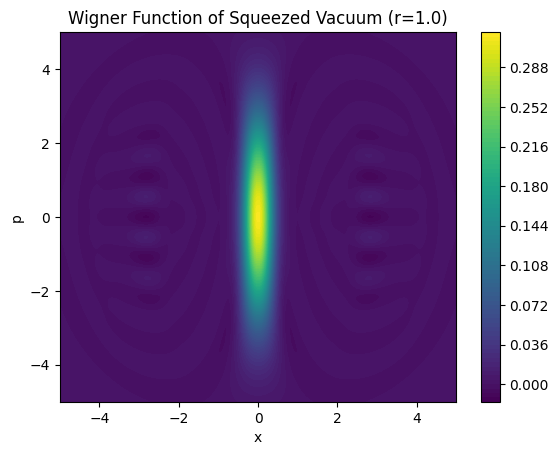

In [18]:
from qutip import squeeze, tensor

# Create vacuum Fock state
dimension = 20
vacuum = fock(dimension, 0)

# Create squeezed vacuum state
r = 1.0
squeezed = squeeze(dimension, r)

# Combine to get squeezed vacuum state (product of squeezing operator and vacuum)
squeezed_vacuum = squeezed * vacuum

# Plot Wigner function
Z_sq = wigner(squeezed_vacuum, x, y)

plt.contourf(X, Y, Z_sq, 100)
plt.title(f'Wigner Function of Squeezed Vacuum (r={r})')
plt.xlabel('x')
plt.ylabel('p')
plt.colorbar()
plt.show()


## Excercise 3

In [1]:
!pip install strawberryfields scipy==1.10.1 --quiet

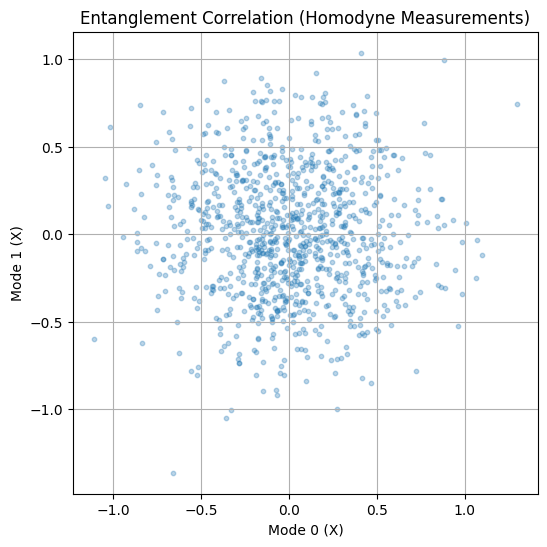

In [5]:
import strawberryfields as sf
from strawberryfields import ops
import matplotlib.pyplot as plt
from typing import Tuple
import numpy as np

def generate_entanglement_circuit(sq_val: float = 1.0, shots: int = 1000) -> Tuple[np.ndarray, np.ndarray]:
    """
    Runs the entanglement circuit manually 'shots' times since MeasureX isn't supported in batch.

    Parameters:
    sq_val (float): Squeezing value.
    shots (int): Number of times to run the circuit.

    Returns:
    Tuple of np.ndarrays: Homodyne measurement results from both modes.
    """
    x0_vals = []
    x1_vals = []

    for _ in range(shots):
        eng = sf.Engine("gaussian")
        prog = sf.Program(2)

        with prog.context as q:
            ops.Sgate(sq_val) | q[0]
            ops.Sgate(sq_val) | q[1]
            ops.BSgate() | (q[0], q[1])
            ops.MeasureX | q[0]
            ops.MeasureX | q[1]

        result = eng.run(prog)
        x0, x1 = result.samples[0]
        x0_vals.append(x0)
        x1_vals.append(x1)

    return np.array(x0_vals), np.array(x1_vals)

# Run and plot
x0, x1 = generate_entanglement_circuit()

plt.figure(figsize=(6, 6))
plt.scatter(x0, x1, alpha=0.3, s=10)
plt.title("Entanglement Correlation (Homodyne Measurements)")
plt.xlabel("Mode 0 (X)")
plt.ylabel("Mode 1 (X)")
plt.grid(True)
plt.axis("equal")
plt.show()
